In [41]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras import models

from keras.layers import Dense
from keras.models import Sequential

In [42]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


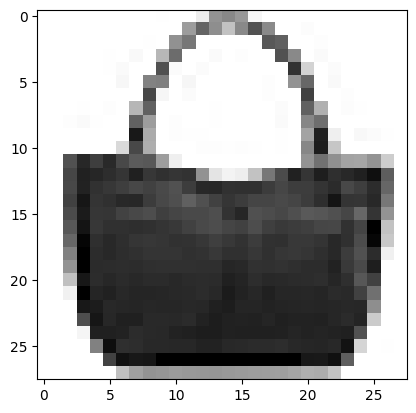

So nay la: 8


In [43]:
hinh = train_images[100]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show()
print('So nay la:',train_labels[100])

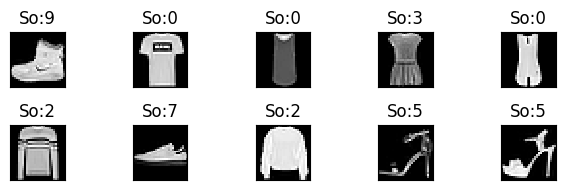

In [44]:
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap = 'gray',interpolation = 'none')
  plt.title('So:{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [48]:
model = Sequential()

model.add(Dense(512, activation = 'relu',input_shape = (28*28,))) 

model.add(Dense(10,activation = 'softmax'))

model.summary()
     

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 512)               401920    
                                                                 
 dense_14 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [51]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255
     

test_images = test_images.reshape((10000,28*28))
test_image = test_images.astype('float32')/255

In [52]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels, 10) 
test_labels = to_categorical(test_labels, 10)

In [53]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs= 10, batch_size= 128)
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Hàm mất mát trong tệp kiểm tra (Test loss:)',test_loss)
print('Test accuracy :',test_acc)

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.5657 - accuracy: 0.7997
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3885 - accuracy: 0.8576
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3425 - accuracy: 0.8737
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3142 - accuracy: 0.8838
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2933 - accuracy: 0.8924
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2799 - accuracy: 0.8966
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2643 - accuracy: 0.9015
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2546 - accuracy: 0.9045
Epoch 9/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2456 - accuracy: 0.9078
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 66.0104 - accuracy: 0.8

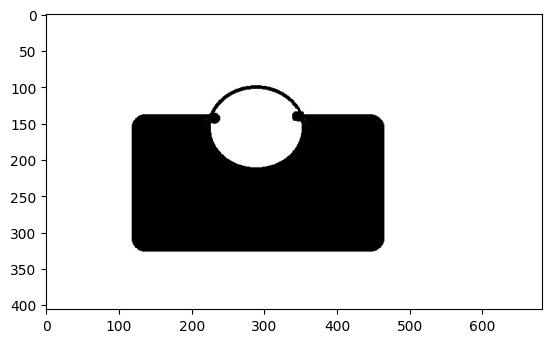

In [59]:
from keras.utils import load_img
url='tuixach.jpg'
img = load_img(url)
plt.imshow(img)

In [60]:
from keras.utils.image_utils import img_to_array
from keras.utils import load_img

img = load_img(url, target_size = (28,28))
img = img_to_array(img)
img2 = np.zeros((28, 28))
for x in range(28):
  for y in range(28):
     img2[x][y] = img[x][y][1]
img2 = img2.reshape(1,28*28)
img2 = img2.astype('float32')
img2 = img2/255
np.argmax(model.predict(img2), axis = -1)

1/1 [==============================] - 0s 49ms/step


array([8])